# Fuzzy

#### Fuzzy membership degree between [0,1] of a condition with several membership functions
#### Fuzzy Logic System Architecture (Mamdani):
<img src="./fis_functional_blocks.jpg">

#### Crisp -> non fuzzy unit
- Fuzzification Module Inference: Convert crisp to fuzzy unit
- Knowledge Base: If then rules provided by expert in the system
- Decision Making Unit: Engine to give conclusion according to knowledge base
- Defuzzification Module Inference: Convert fuzzy unit to crisp

# Membership Function in Fuzzy, Conversion of Crisp Input to Fuzzy Unit

#### Triangle Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
x = np.arange(0, 255, 1)
a = 100
b = 150
c = 200
y = fuzz.trimf(x, [a, b, c])
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('Fuzzy Membership Degree')
plt.title('Triangle Membership Function')
plt.grid(True)

#### Trapezoid Function

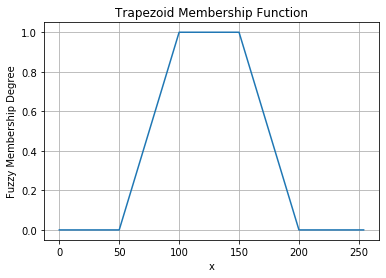

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
x = np.arange(0, 255, 1)
a = 50
b = 100
c = 150
d = 200
y = fuzz.trapmf(x, [a, b, c, d])
plt.plot(y)
plt.xlabel('x')
plt.ylabel('Fuzzy Membership Degree')
plt.title('Trapezoid Membership Function')
plt.grid(True)

#### Gaussian Function

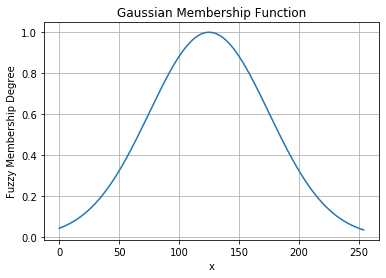

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
x = np.arange(0, 255, 1)
a = 125
b = 50
y = fuzz.gaussmf(x, a, b)
plt.plot(y)
plt.xlabel('x')
plt.ylabel('Fuzzy Membership Degree')
plt.title('Gaussian Membership Function')
plt.grid(True)

#### Bell Function

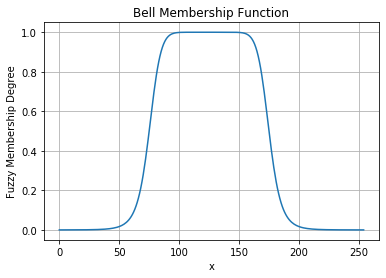

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
x = np.arange(0, 255, 1)
a = 50
b = 5
c = 125
y = fuzz.gbellmf(x, a, b, c)
plt.plot(y)
plt.xlabel('x')
plt.ylabel('Fuzzy Membership Degree')
plt.title('Bell Membership Function')
plt.grid(True)

# Fuzzy Member Operation

#### For A and B fuzzy member, we can do some operation:
#### Complement, Union, Intersection

# Fuzzy Inference System
![simulator](simulator.png)
Simulator Pemadam Kebakaran Berbasis Fuzzy

In [5]:
# Fungsi Keanggotaan Input Output
Suhu = np.arange(0, 255, 1)
Asap = np.arange(0, 255, 1)
Semprotan = np.arange(0, 255, 1)

# Fungsi Keanggotaan Suhu
t_Suhu_Rendah = fuzz.trapmf(Suhu, [-1, 0, 100, 255]) 
t_Suhu_Tinggi = fuzz.trapmf(Suhu, [0, 155, 255, 256])  

# Fungsi Keanggotaan Asap
t_Asap_Sedikit = fuzz.trapmf(Asap, [-1, 0, 100, 255])  
t_Asap_Banyak  = fuzz.trapmf(Asap, [0, 155, 255, 256])     

# Fungsi Keanggotaan Semprotan
t_Semprotan_Kecil = fuzz.trapmf(Semprotan, [-1, 0, 100, 255])  
t_Semprotan_Besar = fuzz.trapmf(Semprotan, [0, 155, 255, 256])   

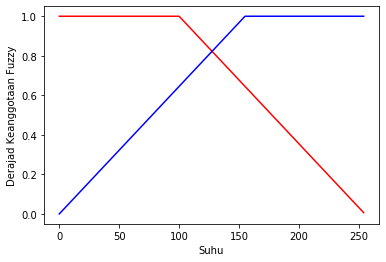

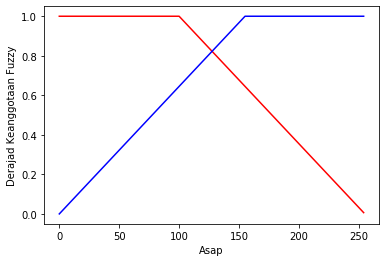

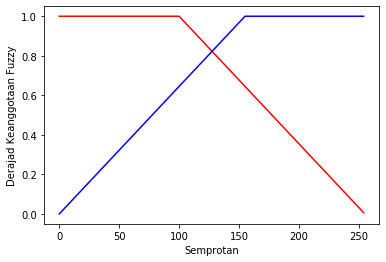

In [6]:
# Visualisasi Fungsi Keanggotaan Suhu
fig, ax = plt.subplots()
ax.plot(Suhu, t_Suhu_Rendah, 'r', Suhu, t_Suhu_Tinggi, 'b')
ax.set_ylabel('Derajad Keanggotaan Fuzzy')
ax.set_xlabel('Suhu')
ax.set_ylim(-0.05, 1.05);

# Visualisasi Fungsi Keanggotaan Asap
fig, ax = plt.subplots()
ax.plot(Asap, t_Asap_Sedikit, 'r', Asap, t_Asap_Banyak, 'b')
ax.set_ylabel('Derajad Keanggotaan Fuzzy')
ax.set_xlabel('Asap')
ax.set_ylim(-0.05, 1.05);

# Visualisasi Fungsi Keanggotaan Semprotan
fig, ax = plt.subplots()
ax.plot(Semprotan, t_Semprotan_Kecil, 'r', Semprotan, t_Semprotan_Besar, 'b')
ax.set_ylabel('Derajad Keanggotaan Fuzzy')
ax.set_xlabel('Semprotan')
ax.set_ylim(-0.05, 1.05);

In [7]:
def Suhu_category(Suhu_in = 1):
    Suhu_cat_Rendah = fuzz.interp_membership(Suhu, t_Suhu_Rendah, Suhu_in) 
    Suhu_cat_Tinggi = fuzz.interp_membership(Suhu, t_Suhu_Tinggi, Suhu_in)
    return dict(Rendah = Suhu_cat_Rendah, Tinggi = Suhu_cat_Tinggi)

def Asap_category(Asap_in = 2):
    Asap_cat_Sedikit = fuzz.interp_membership(Asap, t_Asap_Sedikit, Asap_in)
    Asap_cat_Banyak  = fuzz.interp_membership(Asap, t_Asap_Banyak, Asap_in)
    return dict(Sedikit = Asap_cat_Sedikit, Banyak = Asap_cat_Banyak)

# Contoh input 
Suhu_in = Suhu_category(100)
Asap_in = Asap_category(100)
print ("Suhu terukur"), Suhu_in
print ("Asap terukur"), Asap_in 

Suhu terukur
Asap terukur


(None, {'Sedikit': 1.0, 'Banyak': 0.6451612903225806})

In [8]:
rule1 = np.fmin(Suhu_in['Tinggi'], Asap_in['Banyak'])
rule2 = np.fmin(Suhu_in['Tinggi'], Asap_in['Sedikit'])
rule3 = np.fmin(Suhu_in['Rendah'], Asap_in['Banyak'])
rule4 = np.fmin(Suhu_in['Rendah'], Asap_in['Sedikit'])

In [9]:
imp1 = np.fmin(rule1, t_Semprotan_Besar)
imp2 = np.fmin(rule2, t_Semprotan_Besar)
imp3 = np.fmin(rule3, t_Semprotan_Kecil)
imp4 = np.fmin(rule4, t_Semprotan_Kecil)

## Aggregate Output
#### Some aggregation method:
- max (maximum)
- min (minimum)
- probor (probabilistic OR)
- sum (sum of the rule output sets)

In [10]:
# Hitung aggregat semua output
aggregate_membership = np.fmin(imp1, np.fmin(imp2, np.fmin(imp3,imp4)))

In [11]:
# Hitung Defuzzifikasi menggunakan centroid
result_Semprotan = fuzz.defuzz(Semprotan, aggregate_membership , 'centroid')
print (result_Semprotan)

127.49590847016553


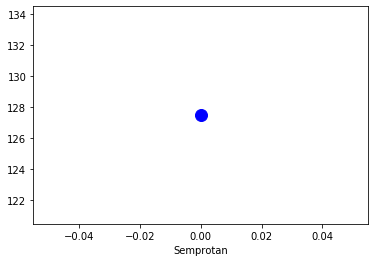

In [12]:
# Visualisasi
plt.plot(result_Semprotan, 'bo', linewidth=2, markersize=12)
plt.xlabel('Semprotan');

# Defuzzification Alternatives

#### Before we just use centroid for defuzzification, these are some example for alternative defuzzification method:
- Centroid
- Bisector
- Middle of Maximum
- Smallest of Maximum
- Largest of Maximum

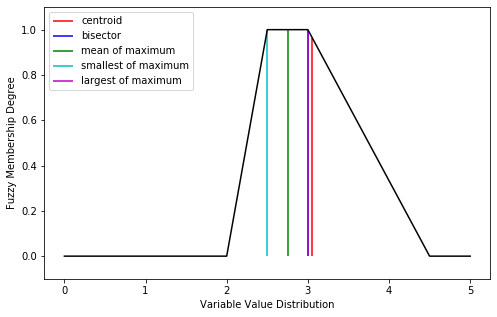

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Hasilkan fungsi keanggotaan trapesium pada rentang [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzifikasi menggunakan lima cara
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid') # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Kumpulkan info untuk garis vertikal
labels = ['centroid', 'bisector', 'mean of maximum', 'smallest of maximum',
'largest of maximum']
xvals = [defuzz_centroid,
defuzz_bisector,
defuzz_mom,
defuzz_som,
defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Tampilkan dan bandingkan hasil defuzzifikasi
plt.figure(figsize=(8, 5))
plt.plot(x, mfx, 'k')

for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy Membership Degree')
plt.xlabel('Variable Value Distribution')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.show()